# Assignment 2

Before working on this assignment please read these instructions fully. In the submission area, you will notice that you can click the link to **Preview the Grading** for each step of the assignment. This is the criteria that will be used for peer grading. Please familiarize yourself with the criteria before beginning the assignment.

An NOAA dataset has been stored in the file `data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv`. This is the dataset to use for this assignment. Note: The data for this assignment comes from a subset of The National Centers for Environmental Information (NCEI) [Daily Global Historical Climatology Network](https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt) (GHCN-Daily). The GHCN-Daily is comprised of daily climate records from thousands of land surface stations across the globe.

Each row in the assignment datafile corresponds to a single observation.

The following variables are provided to you:

* **id** : station identification code
* **date** : date in YYYY-MM-DD format (e.g. 2012-01-24 = January 24, 2012)
* **element** : indicator of element type
    * TMAX : Maximum temperature (tenths of degrees C)
    * TMIN : Minimum temperature (tenths of degrees C)
* **value** : data value for element (tenths of degrees C)

For this assignment, you must:

1. Read the documentation and familiarize yourself with the dataset, then write some python code which returns a line graph of the record high and record low temperatures by day of the year over the period 2005-2014. The area between the record high and record low temperatures for each day should be shaded.
2. Overlay a scatter of the 2015 data for any points (highs and lows) for which the ten year record (2005-2014) record high or record low was broken in 2015.
3. Watch out for leap days (i.e. February 29th), it is reasonable to remove these points from the dataset for the purpose of this visualization.
4. Make the visual nice! Leverage principles from the first module in this course when developing your solution. Consider issues such as legends, labels, and chart junk.

The data you have been given is near **Ann Arbor, Michigan, United States**, and the stations the data comes from are shown on the map below.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

# load the data set
df = pd.read_csv('data/C2A2_data/BinnedCsvs_d400/fb441e62df2d58994928907a91895ec62c2c42e6cd075c2700843b89.csv')
print(df.shape)
df.head()              

(165085, 4)


,ID,Date,Element,Data_Value
0,USW00094889,2014-11-12,TMAX,22
1,USC00208972,2009-04-29,TMIN,56
2,USC00200032,2008-05-26,TMAX,278
3,USC00205563,2005-11-11,TMAX,139
4,USC00200230,2014-02-27,TMAX,-106


In [2]:
# add convenient columns: YEAR and DAY_OF_YEAR

df["Year"] = df.Date.str[:4]
df["Day_of_Year"] = df.Date.str[5:]

# remove leap days
df = df[df["Day_of_Year"] != "02-29"]

# check there is no NA values
print(df.Data_Value.isnull().sum() == 0.0)

df.head()


True


,ID,Date,Element,Data_Value,Year,Day_of_Year
0,USW00094889,2014-11-12,TMAX,22,2014,11-12
1,USC00208972,2009-04-29,TMIN,56,2009,04-29
2,USC00200032,2008-05-26,TMAX,278,2008,05-26
3,USC00205563,2005-11-11,TMAX,139,2005,11-11
4,USC00200230,2014-02-27,TMAX,-106,2014,02-27


In [3]:
# get the record high and record low temperatures by day of the year over the period 2005-2014

def temperature_timeseries(condition):
    ts = ( df
      .where(condition)
      .dropna()
      .groupby(["Day_of_Year","Element"])
      .Data_Value
      .agg(["max","min"])
      .unstack()
      .sort_index() # making sure dates are sorted ascendingly
     )
    ts = ts[[("min","TMIN"),("max","TMAX")]]
    ts.columns = ["min", "max"]
    return ts

temperature_until_2014 = temperature_timeseries(df.Year != "2015")
print(temperature_until_2014.head())
print()
print(temperature_until_2014.shape)

# get the record high and record low temperatures by day of the year over the period 2015
temperature_2015 = temperature_timeseries(df.Year == "2015")
print(temperature_2015.head())
print()
print(temperature_2015.shape)

# 2015 data for which the ten year record (2005-2014) record high or record low was broken in 2015
temperature_2015_vs_older = pd.merge(temperature_until_2014, temperature_2015, left_index=True, right_index=True, suffixes=('_upto_2014', '_2015'))
print(temperature_2015_vs_older.head())
print()
temperature_2015_min = temperature_2015_vs_older[ temperature_2015_vs_older.min_2015 < temperature_2015_vs_older.min_upto_2014 ].loc[:,"min_2015"]
temperature_2015_max = temperature_2015_vs_older[ temperature_2015_vs_older.max_2015 > temperature_2015_vs_older.max_upto_2014 ].loc[:,"max_2015"]
print(temperature_2015_min.tail(10))
print()
print(temperature_2015_max.tail(10))

               min    max
Day_of_Year              
01-01       -160.0  156.0
01-02       -267.0  139.0
01-03       -267.0  133.0
01-04       -261.0  106.0
01-05       -150.0  128.0

(365, 2)
               min   max
Day_of_Year             
01-01       -133.0  11.0
01-02       -122.0  39.0
01-03        -67.0  39.0
01-04        -88.0  44.0
01-05       -155.0  28.0

(365, 2)
             min_upto_2014  max_upto_2014  min_2015  max_2015
Day_of_Year                                                  
01-01               -160.0          156.0    -133.0      11.0
01-02               -267.0          139.0    -122.0      39.0
01-03               -267.0          133.0     -67.0      39.0
01-04               -261.0          106.0     -88.0      44.0
01-05               -150.0          128.0    -155.0      28.0

Day_of_Year
04-24   -71.0
04-25   -50.0
05-20     0.0
07-03    72.0
08-28    56.0
10-17   -55.0
10-18   -55.0
10-19   -61.0
10-20   -39.0
11-10   -44.0
Name: min_2015, dtype: float64

Day_

<IPython.core.display.Javascript object>


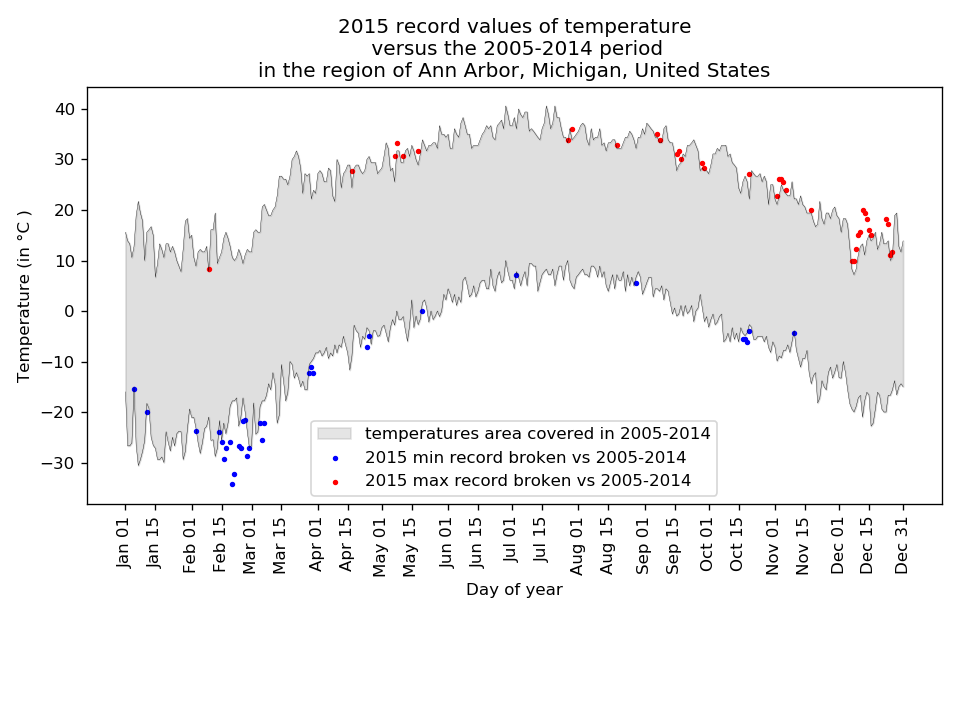

In [6]:
plt.figure(figsize=(8,6), dpi=120)

# plotting the record high and record low temperatures by day of the year over the period 2005-2014
temperature_min = temperature_until_2014["min"]/10.0
temperature_max = temperature_until_2014["max"]/10.0
x = range(len(temperature_min.index))
plt.plot(x, temperature_min, color='black', label="2005-2014 max", linewidth=0.2)
plt.plot(x, temperature_max, color='black', label='2005-2014 min', linewidth=0.2)
plt.fill_between(x, temperature_min, temperature_max, color="grey", alpha=0.25)

# plotting 2015 data for which the ten year record (2005-2014) record high or record low was broken in 2015
x1 = map(lambda x:temperature_min.index.get_loc(x), temperature_2015_min.index)#range(len(temperature_2015_min.index))
x2 = map(lambda x:temperature_min.index.get_loc(x), temperature_2015_max.index)#range(len(temperature_2015_max.index))
scatter_min = plt.scatter(list(x1), temperature_2015_min/10, color="blue", s=5)
scatter_max = plt.scatter(list(x2), temperature_2015_max/10, color="red", s=5)

# working the legend for the grey area
# dummy rectangle to create the fill between legend (since no legend for the fill_between method)
from matplotlib.patches import Rectangle
rect_cos = Rectangle((0,0), 0,0, color='grey', alpha=0.2)
legend_objects = [rect_cos, scatter_min, scatter_max]
legend_labels = ["temperatures area covered in 2005-2014", "2015 min record broken vs 2005-2014", "2015 max record broken vs 2005-2014"]
plt.legend(legend_objects, legend_labels)
plt.subplots_adjust(bottom=0.3)

# title, labels
plt.ylabel("Temperature (in °C )")
plt.title("2015 record values of temperature\n versus the 2005-2014 period\nin the region of Ann Arbor, Michigan, United States")
plt.xlabel("Day of year")

# pretty formatting the ticks
days_in_months = {"Jan": 31, "Feb": 28, "Mar": 31, "Apr": 30, "May": 31, 
                 "Jun": 30, "Jul": 31, "Aug": 31, "Sep": 30, "Oct": 31, "Nov": 30, "Dec":31}
labels_every_15d = []
locations = []
days_consumed = 0
for month, days_in_month in days_in_months.items():
    for nbday in [1,15]:
        labels_every_15d.append("%s %02d" %(month,nbday) )
        locations.append(days_consumed + nbday -1)
    days_consumed += days_in_month
labels_every_15d.append("Dec 31")
locations.append(364)
plt.xticks(locations, labels_every_15d, rotation = 90)

# figure adjustments
plt.tight_layout()
plt.subplots_adjust(bottom=0.3)
plt.show()
plt.savefig("ann_arbor_temperature_2015_record.png")